In [4]:
#install from requirements.txt
!pip install -q -r requirements.txt

In [5]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit  #Importing the QuantumCircuit function from Qiskit. We will use this to create our quantum circuits!
import qiskit.tools.jupyter
# We will use these functions to run our circuit and visualize its final state
from qiskit import Aer, execute
from qiskit.visualization import *
from qiskit_textbook.tools import array_to_latex

from qiskit import IBMQ


import warnings  # We are using this library to suppress some warning messages
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Libraries imported successfully!


In [6]:
IBMQ.load_account() #Load your account

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
provider = IBMQ.providers()[1] #Get the list of providers
provider

<AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>

In [8]:
provider.backends() #Get the list of backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <IBMQBackend('ibmq_kolkata') from IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <IBMQBackend('ibmq_guadalupe') from IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate

In [9]:
backend = provider.get_backend('ibmq_guadalupe') #Get the backend

In [10]:
qc = QuantumCircuit(2, 2)  # Creating a quantum circuit with 2 qubits and 2 classical bits
qc.h(0)  # Applying a Hadamard gate to the first qubit
qc.cx(0, 1)  # Applying a CNOT gate to the first qubit controlled by the second qubit
qc.cx(1, 0)  # Applying a CNOT gate to the second qubit controlled by the first qubit
qc.measure_all()  # Measuring the qubits

In [11]:
# Simulate using QASM
job = execute(qc, backend = backend, shots = 1024)  # Make sure you change "qc" to the name of your quantum circuit in this line!
result = job.result()
counts = result.get_counts()
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [12]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

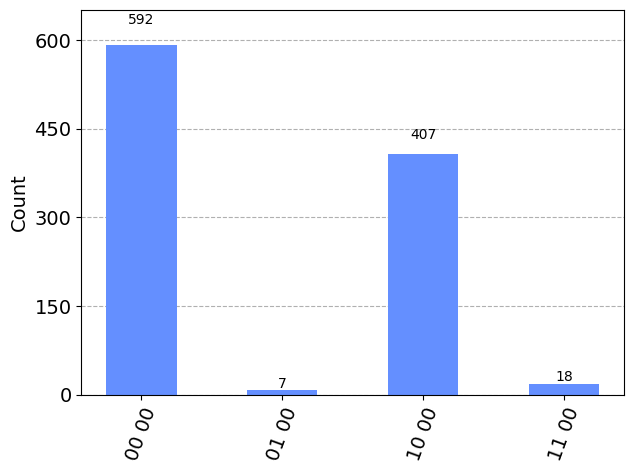

In [13]:
plot_histogram(counts)